In [1]:
import datetime

import pandas as pd
from ptrail.core.TrajectoryDF import PTRAILDataFrame
from ptrail.preprocessing.statistics import Statistics
from ptrail.preprocessing.filters import Filters
from ptrail.features.kinematic_features import KinematicFeatures

"""
    First, to begin with the following actions ar performed:
        1. Read the database from the csv file using pandas.
        2. Convert the pandas dataframe to PTRAILDataFrame DataFrame
           in order to represent the data with PTRAIL.

    It is to be duly noted that the Starkey Project database provided
    originally has been modified here to meet with the needs of
    PTRAIL Library.
"""
pdf = pd.read_csv('https://raw.githubusercontent.com/YakshHaranwala/PTRAIL/main/examples/data/starkey.csv')
starkey = PTRAILDataFrame(data_set=pdf,
                          latitude='lat',
                          longitude='lon',
                          datetime='DateTime',
                          traj_id='Id')
print("Size of the Dataset: {}".format(starkey.shape))
starkey.head(5)

Size of the Dataset: (287136, 15)


lat         lon  StarkeyTime    GMDate  \
traj_id   DateTime                                                            
880109D01 1995-04-13 13:40:06  45.239682 -118.533204    229902006  21:40:06   
          1995-04-15 12:16:15  45.250521 -118.530438    230069775  20:16:15   
          1995-04-15 21:39:38  45.247943 -118.541455    230103578  05:39:38   
          1995-04-16 03:32:14  45.247429 -118.539530    230124734  11:32:14   
          1995-04-16 04:08:28  45.247117 -118.542579    230126908  12:08:28   

                                 GMTime   LocDate   LocTime  RadNum  Species  \
traj_id   DateTime                                                             
880109D01 1995-04-13 13:40:06  19950413  19950413  13:40:06     409        0   
          1995-04-15 12:16:15  19950415  19950415  12:16:15     409        0   
          1995-04-15 21:39:38  19950416  19950415  21:39:38     409        0   
          1995-04-16 03:32:14  19950416  19950416  03:32:14     409        0   
          1995-04-16 04:08:28  19950416  19950416  04:08:28     409        0   

                                 UTME     UTMN  Year  Grensunr  Grensuns  \
traj_id   DateTime                                                         
880109D01 1995-04-13 13:40:06  379662  5010734    95  13:13:00  02:39:00   
          1995-04-15 12:16:15  379895  5011927    95  13:09:00  02:41:00   
          1995-04-15 21:39:38  379039  5011656    95  13:07:00  02:43:00   
          1995-04-16 03:32:14  379188  5011581    95  13:07:00  02:43:00   
          1995-04-16 04:08:28  378938  5011567    95  13:07:00  02:43:00   

                               Obswt  
traj_id   DateTime                    
880109D01 1995-04-13 13:40:06   1.47  
          1995-04-15 12:16:15   1.59  
          1995-04-15 21:39:38   1.34  
          1995-04-16 03:32:14   1.50  
          1995-04-16 04:08:28   1.34

In [2]:
# Generate kinematic stats here.
kin_starkey = KinematicFeatures.generate_kinematic_features(dataframe=starkey)
# kin_starkey = Filters.hampel_outlier_detection(kin_starkey, 'Speed')
kin_starkey.head()

lat         lon  StarkeyTime    GMDate  \
traj_id   DateTime                                                            
880109D01 1995-04-13 13:40:06  45.239682 -118.533204    229902006  21:40:06   
          1995-04-15 12:16:15  45.250521 -118.530438    230069775  20:16:15   
          1995-04-15 21:39:38  45.247943 -118.541455    230103578  05:39:38   
          1995-04-16 03:32:14  45.247429 -118.539530    230124734  11:32:14   
          1995-04-16 04:08:28  45.247117 -118.542579    230126908  12:08:28   

                                 GMTime   LocDate   LocTime  RadNum  Species  \
traj_id   DateTime                                                             
880109D01 1995-04-13 13:40:06  19950413  19950413  13:40:06     409        0   
          1995-04-15 12:16:15  19950415  19950415  12:16:15     409        0   
          1995-04-15 21:39:38  19950416  19950415  21:39:38     409        0   
          1995-04-16 03:32:14  19950416  19950416  03:32:14     409        0   
          1995-04-16 04:08:28  19950416  19950416  04:08:28     409        0   

                                 UTME  ...  Grensuns  Obswt     Distance  \
traj_id   DateTime                     ...                                 
880109D01 1995-04-13 13:40:06  379662  ...  02:39:00   1.47          NaN   
          1995-04-15 12:16:15  379895  ...  02:41:00   1.59  1224.551334   
          1995-04-15 21:39:38  379039  ...  02:43:00   1.34   908.878736   
          1995-04-16 03:32:14  379188  ...  02:43:00   1.50   161.204428   
          1995-04-16 04:08:28  378938  ...  02:43:00   1.34   241.258531   

                              Distance_from_start     Speed  Acceleration  \
traj_id   DateTime                                                          
880109D01 1995-04-13 13:40:06                 NaN       NaN           NaN   
          1995-04-15 12:16:15         1224.551334  0.007299           NaN   
          1995-04-15 21:39:38         1122.894480  0.026888  5.794895e-07   
          1995-04-16 03:32:14          993.546091  0.007620 -9.107449e-07   
          1995-04-16 04:08:28         1105.541563  0.110974  4.754125e-05   

                                       Jerk     Bearing  Bearing_Rate  \
traj_id   DateTime                                                      
880109D01 1995-04-13 13:40:06           NaN         NaN           NaN   
          1995-04-15 12:16:15           NaN   10.187713           NaN   
          1995-04-15 21:39:38           NaN  251.614406      0.007142   
          1995-04-16 03:32:14 -7.044028e-11  110.769883     -0.006657   
          1995-04-16 04:08:28  2.228703e-08  261.754471      0.069450   

                               Rate_of_bearing_rate  
traj_id   DateTime                                   
880109D01 1995-04-13 13:40:06                   NaN  
          1995-04-15 12:16:15                   NaN  
          1995-04-15 21:39:38              0.007142  
          1995-04-16 03:32:14             -0.006657  
          1995-04-16 04:08:28              0.069450  

[5 rows x 23 columns]

In [3]:
# Get one traj_id out.
one_animal = kin_starkey.reset_index().loc[kin_starkey.reset_index()['traj_id'] == '880109D01']

# Get all the animals belonging to the above animal's species.
one_species = kin_starkey.reset_index().loc[kin_starkey.reset_index()['Species'] == one_animal.Species.iloc[0]]
stats = one_species.describe(percentiles=[0.1, 0.25, 0.5, 0.75, 0.9])

In [4]:
import seaborn as sns
import datetime
import numpy as np
import matplotlib.pyplot as plt


def plot_stats(stat):
    # Matplotlib figure and colors from sns.
    fig, ax = plt.subplots(figsize=(13, 7))
    colors = sns.color_palette('tab10')

    # Get the necessary stats out.
    percent_10 = stats[stat]['10%']
    percent_25 = stats[stat]['25%']
    percent_50 = stats[stat]['50%']
    percent_75 = stats[stat]['75%']
    percent_90 = stats[stat]['90%']
    avg = stats[stat]['mean']

    # Attributes for the plot.
    text = ['10%', '25%', 'Median', '75%', '90%', 'Mean']
    horizontal_lines = [percent_10, percent_25, percent_50, percent_75, percent_90, avg]

    # Plot the lineplot and the stat lines.
    sns.lineplot(data=one_animal.reset_index(), x='DateTime', y=stat, ax=ax, color='skyblue')
    for i in range(len(horizontal_lines)):
        ax.axhline(horizontal_lines[i], c=colors[i], linestyle='--', label=text[i])

    # Show the legend and the plot.
    plt.legend()
    plt.tight_layout()

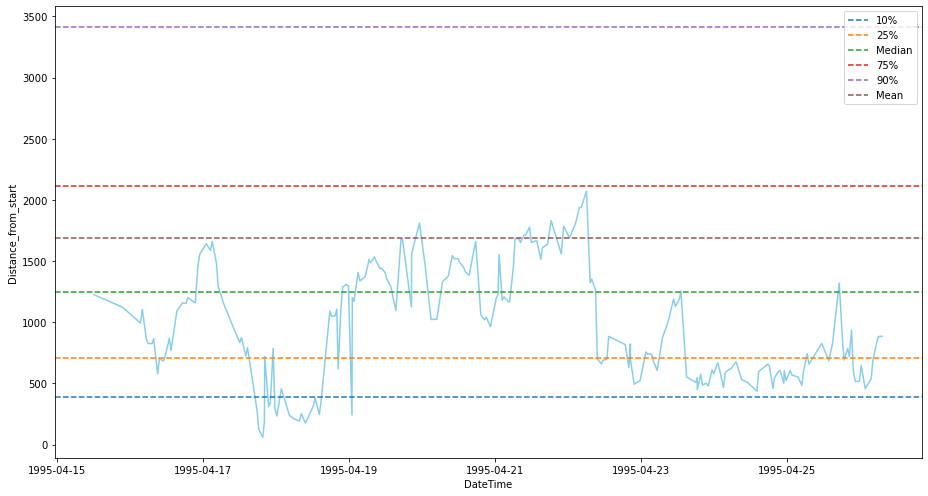

In [5]:
plot_stats('Distance_from_start')